# Overall Data Import and Preparation (Note: this is the smaller "January only" file)

In [56]:
import nltk
from nltk import FreqDist
nltk.download('punkt')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

data = pd.read_csv(r'C:\Users\Home\Documents\Text Analytics\Assignments\Assignment 1\News_Article_2016_Jan.csv')

#For future use, isolate only the "content" column. 
content_only = data['Content']
                   
#For use in problem #2, isolate two companies from the same sector
#make Microsoft and IBM filter
microsoft_IBM_filter = (data['Name'] == 'MICROSOFT') | (data['Name'] == 'IBM')

#apply the filter
microsoft_and_ibm_only = data.loc[microsoft_IBM_filter].reset_index()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Problem 1

## Part 1: Prep data, as the process pertains uniquely to Problem 1

In [ ]:
#Tokenize "Content". 
# Note: word_tokenize() only accepts 1 string at a time. I must loop through the strings and then tokenize it.
tokens_list = []
for i in content_only:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        tokens_list.append(j)

##change all tokens into lower case 
lower_case = [i.lower() for i in tokens_list]

#only keep text words, no numbers 
words_only = [i for i in lower_case if i.isalpha()]

## Part 2: Bag of Words Approach

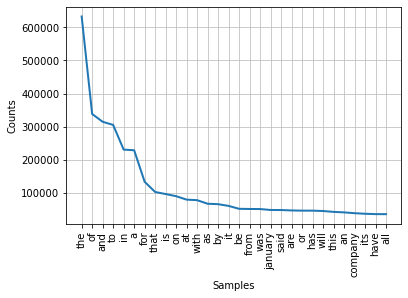

In [27]:
#generate a frequency dictionary for all tokens 
bag_of_words_frequency_distribution = FreqDist(words_only)

        #convert frequency distribution to dataframe
        #bag_of_words_frequency_distribution_dataframe = pd.DataFrame.from_dict(bag_of_words_frequency_distribution, orient='index')
        #bag_of_words_frequency_distribution_dataframe.columns = ['Frequency']
        #bag_of_words_frequency_distribution_dataframe.index.name = 'Term'

        #Sort dataframe by Frequency
        #bag_of_words_frequency_distribution_dataframe.sort_values(by=['Frequency'], inplace=True, ascending=False)

#Grab the first 30 rows (top 30 terms by frequency) and make a distribution chart
bag_of_words_frequency_distribution.plot(30);

## Part 3: Bag of Words with Lemmatization and Stop Words (Using NLTK stopwords and the Porter Stemmer)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


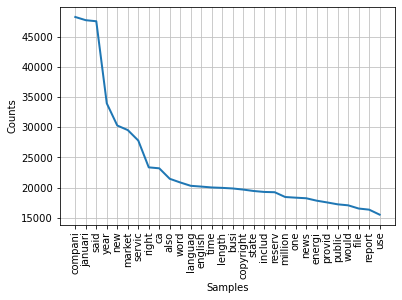

In [29]:
#Introduce NLTK stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

#only keep the words that are not in the NLTK stopwords list
words_only_no_stopwords = [i for i in words_only if i not in stopwords]

#Apply the Porter Stemmer
porter = nltk.PorterStemmer()
stemmed_words = [porter.stem(i) for i in words_only_no_stopwords]

#Get the frequency distribution and plot it
porter_frequency_distribution = FreqDist(stemmed_words)
porter_frequency_distribution.plot(30);

## Part 4: Use Part of Speech approach, focusing on all the noun forms (NN, NNP, NNS, NNPS)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


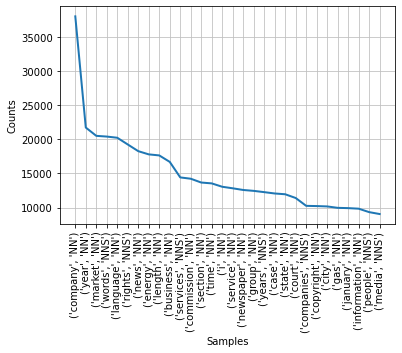

In [33]:
#run the tagger on the tokenized "words_only" list
nltk.download('averaged_perceptron_tagger')
part_of_speech_tags = nltk.pos_tag(words_only)

#Generate a list of part of speech tags for noun forms only
part_of_speech_tag_list = [(word,tag) for (word,tag) in part_of_speech_tags if tag.startswith('N')]

#Generate and plot a frequency distribution of all the part of speech tags
tags_frequency_distribution = nltk.FreqDist(part_of_speech_tag_list)
tags_frequency_distribution.plot(30);

## Part 5: Use Part of Speech approach, focusing on only the NNP noun form

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


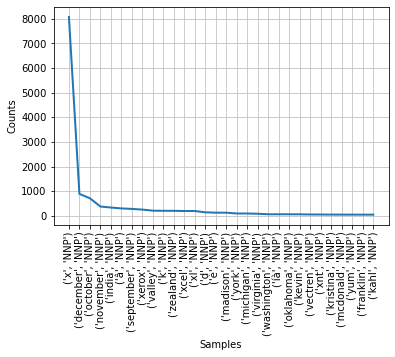

In [34]:
#run the tagger on the tokenized "words_only" list
nltk.download('averaged_perceptron_tagger')
part_of_speech_tags = nltk.pos_tag(words_only)

#Generate a list of part of speech tags for noun forms only
NNP_tag_list = [(word,tag) for (word,tag) in part_of_speech_tags if tag.endswith('NNP')]

#Generate and plot a frequency distribution of all the part of speech tags
NNP_frequency_distribution = nltk.FreqDist(NNP_tag_list)
NNP_frequency_distribution.plot(30);

# Problem 2

## Part 1: Prep data, as the process pertains uniquely to Problem 2

In [57]:
#Using the day of the month present in the default file, create a new column to designate the week number.
week_number = []
for i in microsoft_and_ibm_only['Day']:
    if i <= 8:
        week_number.append(1)
    elif i <= 15:
        week_number.append(2)
    elif i <= 22:
        week_number.append(3)
    elif i <= 31:
        week_number.append(4)

microsoft_and_ibm_only['Week'] = week_number

#Keep only "Week" and "Content" columns, and get them in calendar order
microsoft_and_ibm_week_and_content_only = microsoft_and_ibm_only[['Week','Content']]
microsoft_and_ibm_week_and_content_only = microsoft_and_ibm_week_and_content_only.sort_values(by = 'Week')
microsoft_and_ibm_week_and_content_only.reset_index(inplace = True, drop = True)

## Part 2: Pick the Top 10 Words From Each Week, Focusing on Only Noun Forms (NN, NNP, NNS, NNPS)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Microsoft and IBM Nouns Frequency Distribution for Week 1 of January 2016


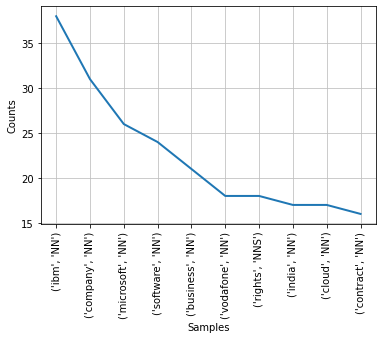

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Microsoft and IBM Nouns Frequency Distribution for Week 2 of January 2016


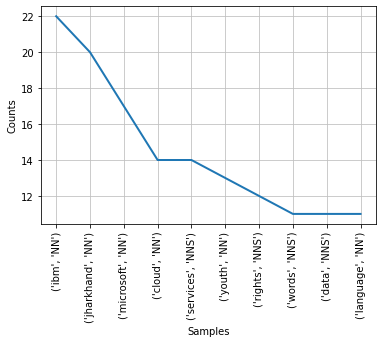

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Microsoft and IBM Nouns Frequency Distribution for Week 3 of January 2016


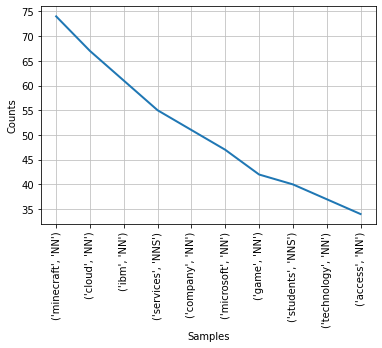

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Microsoft and IBM Nouns Frequency Distribution for Week 4 of January 2016


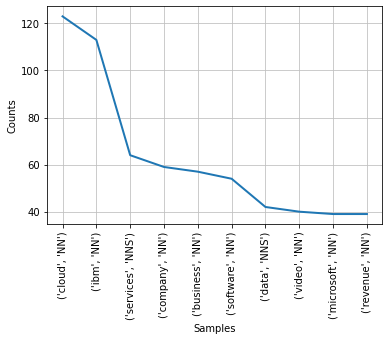

In [61]:
#Tokenize "Content". 
#Note: word_tokenize() only accepts 1 string at a time. I must loop through the strings by week, tokenize them, and conduct the
#frequency distribution analysis.
for week in [1,2,3,4]:
    #make week filter
    week_filter = (microsoft_and_ibm_week_and_content_only['Week'] == week)
    #apply the filter
    by_week_data = microsoft_and_ibm_week_and_content_only.loc[week_filter].reset_index()
    #Begin the tokenization process for the current week in the loop
    tokens_list_2 = []
    for i in by_week_data['Content']:
        tokens = nltk.word_tokenize(i)
        for j in tokens:
            tokens_list_2.append(j)
            
    ##change all tokens into lower case for current week
    lower_case_2 = [i.lower() for i in tokens_list_2]
    #only keep text words, no numbers, for current week
    words_only_2 = [i for i in lower_case_2 if i.isalpha()]
    
    #run the tagger on the tokenized "words_only_2" list
    nltk.download('averaged_perceptron_tagger')
    part_of_speech_tags = nltk.pos_tag(words_only_2)

    #Generate a list of part of speech tags for noun forms only
    part_of_speech_tag_list = [(word,tag) for (word,tag) in part_of_speech_tags if tag.startswith('N')]

    #Generate and plot a frequency distribution of all the part of speech tags
    tags_frequency_distribution = nltk.FreqDist(part_of_speech_tag_list)
    print("Microsoft and IBM Nouns Frequency Distribution for Week",week,"of January 2016")
    tags_frequency_distribution.plot(10);